# KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_x = np.random.random(20)*10
raw_data_x = data_x.reshape(10,-1)
raw_data_x

array([[0.60020742, 6.67323716],
       [2.40933549, 7.54344126],
       [7.98105779, 9.01605135],
       [8.98675935, 9.81324499],
       [1.57144994, 8.56528411],
       [4.48646042, 6.40691499],
       [0.58209008, 0.40128997],
       [5.53694984, 5.13722094],
       [2.46475335, 5.96115609],
       [8.61277779, 0.8541728 ]])

In [18]:
data_y1 = np.zeros(5)
data_y2 = np.ones(5)
raw_data_y = np.append(data_y1,data_y2)
raw_data_y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [19]:
x_train = raw_data_x
y_train = raw_data_y

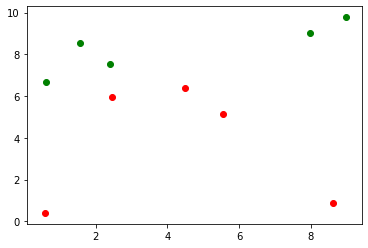

In [38]:
# plt.scatter(x_train[:,:1],x_train[:,1:2])
# x_train[y_train==0,0]
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color = "g")
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color = "r")

In [42]:
x = np.array([6.09,6.36])  # 新数据

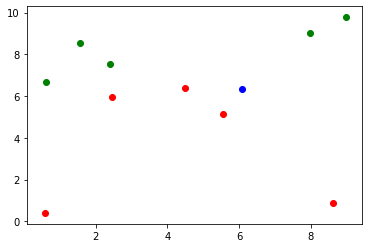

In [43]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color = "g")
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color = "r")
plt.scatter(x[0],x[1],color = 'b')

### knn

In [47]:
from math import sqrt
distances = []
for x_tr in x_train: 
    d =sqrt( np.sum( (x_tr - x)**2 ))  #   ( x_tr[0] - x[0]) **2 + ( x_tr[1] - x[1]) **2
    distances.append(d)
    
    

In [48]:
distances

[5.498721673427504,
 3.866241645434729,
 3.2604767036096196,
 4.507340205816598,
 5.027978980767485,
 1.6042257338009964,
 8.114388265017231,
 1.3420331991093397,
 3.6471207495727604,
 6.0562811142962625]

In [49]:
distances = [sqrt( np.sum( (x_tr - x)**2 )) for x_tr in x_train ] # 列表生成式

In [50]:
distances

[5.498721673427504,
 3.866241645434729,
 3.2604767036096196,
 4.507340205816598,
 5.027978980767485,
 1.6042257338009964,
 8.114388265017231,
 1.3420331991093397,
 3.6471207495727604,
 6.0562811142962625]

In [51]:
np.argsort(distances) # 返回索引排序

array([7, 5, 2, 8, 1, 3, 4, 0, 9, 6])

In [57]:
nearest = np.argsort(distances) #k=6 则 取前三个
k = 3
topK_y = [y_train[i] for i in nearest[:k]]  # 前 k 个元素的 y 值

In [58]:
topK_y

[1.0, 1.0, 0.0]

In [59]:
from collections import Counter
Counter(topK_y) # 统计 topK_y 中 元素出现的次数

Counter({1.0: 2, 0.0: 1})

In [64]:
votes = Counter(topK_y)
votes.most_common(1) # 返回 出现次数最多的 1 个值

[(1.0, 2)]

In [65]:
votes.most_common(1)[0][0] # list 中 第一个 ， 元组中第一个  # 即返回值是对 x[6.09,6.36] 最终预测 结果 1 

1.0